___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [2]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)

# Read Data

In [3]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [4]:
df.head()

make_model body_type  price               vat       km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible  56013.0  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable  80000.0  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible  83450.0  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible  73000.0  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible  16200.0  Used   Diesel   

   Gears                                Comfort_Convenience  \
0    7.0  Air conditioning,Armrest,Automatic climate con...   
1    7.0  Air conditioning,Automatic climate control,Hil...   
2    7.0  Air conditioning,Cruise control,Electrical sid...   
3    6.0  Air suspension,Armrest,Auxiliary heating,Elect...   
4    7.0  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security  age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D...  3.0              2.0   
1  ABS,Central door lock,Central door lock with r...  2.0              1.0   
2  ABS,Central door lock,Daytime running lights,D...  3.0              1.0   
3  ABS,Alarm system,Central door lock with remote...  3.0              1.0   
4  ABS,Central door lock,Driver-side airbag,Elect...  3.0              1.0   

   hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0   66.0               1   Metallic           Cloth    Automatic   
1  141.0               0   Metallic           Cloth    Automatic   
2   85.0               0   Metallic           Cloth    Automatic   
3   66.0               0   Metallic           Cloth    Automatic   
4   66.0               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0           1422.0     1220.0       front        3.8  
1           1798.0     1255.0       front        5.6  
2           1598.0     1135.0       front        3.8  
3           1422.0     1195.0       front        3.8  
4           1422.0     1135.0       front        4.1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
df.describe().T

count          mean           std     min      25%  \
price            15915.0  18024.380584   7381.679318  4950.0  12850.0   
km               15915.0  32089.995708  36977.214964     0.0   1920.5   
Gears            15915.0      5.937355      0.704772     5.0      5.0   
age              15915.0      1.389695      1.121306     0.0      0.0   
Previous_Owners  15915.0      1.042853      0.339178     0.0      1.0   
hp_kW            15915.0     88.499340     26.674341    40.0     66.0   
Inspection_new   15915.0      0.247063      0.431317     0.0      0.0   
Displacement_cc  15915.0   1428.661891    275.804272   890.0   1229.0   
Weight_kg        15915.0   1337.700534    199.682385   840.0   1165.0   
cons_comb        15915.0      4.832124      0.867530     3.0      4.1   

                     50%      75%       max  
price            16900.0  21900.0   74600.0  
km               20413.0  46900.0  317000.0  
Gears                6.0      6.0       8.0  
age                  1.0      2.0       3.0  
Previous_Owners      1.0      1.0       4.0  
hp_kW               85.0    103.0     294.0  
Inspection_new       0.0      0.0       1.0  
Displacement_cc   1461.0   1598.0    2967.0  
Weight_kg         1295.0   1472.0    2471.0  
cons_comb            4.8      5.4       9.1

In [7]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

### Dataya Dönmek Gerekirse

In [8]:
df2 = df.copy()

## Feature Engineering

In [8]:
df.select_dtypes(include ="object").head()

make_model body_type               vat  Type     Fuel  \
0    Audi A1    Sedans    VAT deductible  Used   Diesel   
1    Audi A1    Sedans  Price negotiable  Used  Benzine   
2    Audi A1    Sedans    VAT deductible  Used   Diesel   
3    Audi A1    Sedans    VAT deductible  Used   Diesel   
4    Audi A1    Sedans    VAT deductible  Used   Diesel   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security Paint_Type  \
0  ABS,Central door lock,Daytime running lights,D...   Metallic   
1  ABS,Central door lock,Central door lock with r...   Metallic   
2  ABS,Central door lock,Daytime running lights,D...   Metallic   
3  ABS,Alarm system,Central door lock with remote...   Metallic   
4  ABS,Central door lock,Driver-side airbag,Elect...   Metallic   

  Upholstery_type Gearing_Type Drive_chain  
0           Cloth    Automatic       front  
1           Cloth    Automatic       front  
2           Cloth    Automatic       front  
3           Cloth    Automatic       front  
4           Cloth    Automatic       front

## Dummies control?

In [9]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [10]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

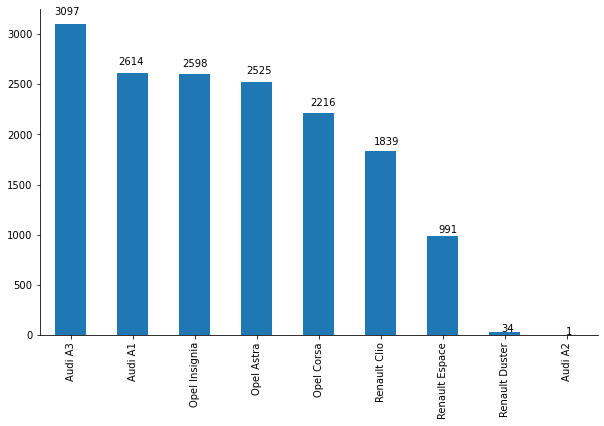

In [11]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [12]:
df[df.make_model=="Audi A2"]

make_model body_type  price             vat       km            Type  \
2614    Audi A2  Off-Road  28200  VAT deductible  26166.0  Employee's car   

        Fuel  Gears                                Comfort_Convenience  \
2614  Diesel    6.0  Air conditioning,Armrest,Automatic climate con...   

                                    Entertainment_Media        Extras  \
2614  Bluetooth,CD player,Hands-free equipment,MP3,O...  Alloy wheels   

                                        Safety_Security  age  Previous_Owners  \
2614  ABS,Adaptive Cruise Control,Central door lock,...  1.0              1.0   

      hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
2614   85.0               0   Metallic           Cloth       Manual   

      Displacement_cc  Weight_kg Drive_chain  cons_comb  
2614           1598.0     1135.0       front        4.9

In [13]:
df.drop(index=[2614], inplace =True)

In [14]:
df.shape

(15914, 23)

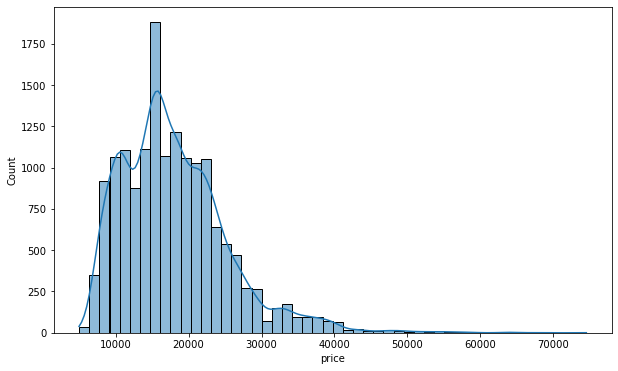

In [15]:
sns.histplot(df.price, bins=50, kde=True);

### skewness

In [16]:
skew(df.price)

1.236330745564795

In [17]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

price            km  Gears  age  Previous_Owners  hp_kW  \
0      15770  56013.000000    7.0  3.0              2.0   66.0   
1      14500  80000.000000    7.0  2.0              1.0  141.0   
2      14640  83450.000000    7.0  3.0              1.0   85.0   
3      14500  73000.000000    6.0  3.0              1.0   66.0   
4      16790  16200.000000    7.0  3.0              1.0   66.0   
...      ...           ...    ...  ...              ...    ...   
15910  39950   1647.362609    6.0  0.0              1.0  147.0   
15911  39885   9900.000000    7.0  0.0              1.0  165.0   
15912  39875     15.000000    6.0  0.0              1.0  146.0   
15913  39700     10.000000    6.0  0.0              1.0  147.0   
15914  40999   1647.362609    6.0  0.0              1.0  165.0   

       Inspection_new  Displacement_cc  Weight_kg  cons_comb  
0                   1           1422.0     1220.0        3.8  
1                   0           1798.0     1255.0        5.6  
2                   0           1598.0     1135.0        3.8  
3                   0           1422.0     1195.0        3.8  
4                   1           1422.0     1135.0        4.1  
...               ...              ...        ...        ...  
15910               0           1997.0     1758.0        5.3  
15911               0           1798.0     1708.0        7.4  
15912               1           1997.0     1734.0        5.3  
15913               0           1997.0     1758.0        5.3  
15914               1           1798.0     1685.0        6.8  

[15914 rows x 10 columns]

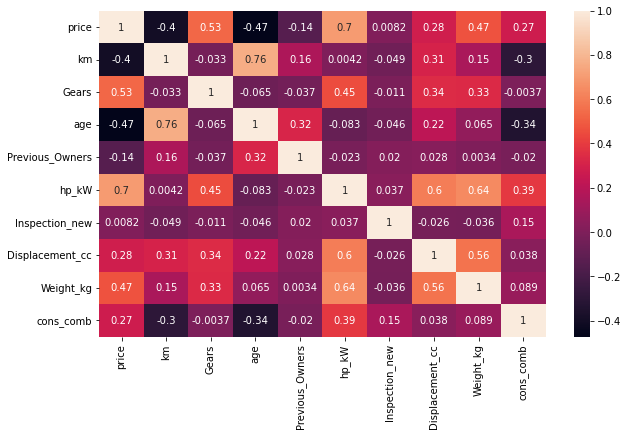

In [18]:
sns.heatmap(df_numeric.corr(), annot =True);

## multicollinearity control

In [19]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [20]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

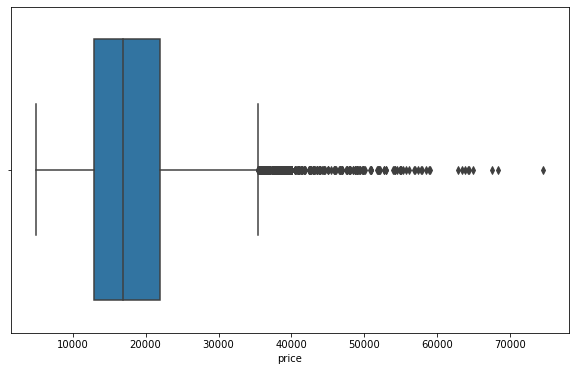

In [21]:
sns.boxplot(df.price);

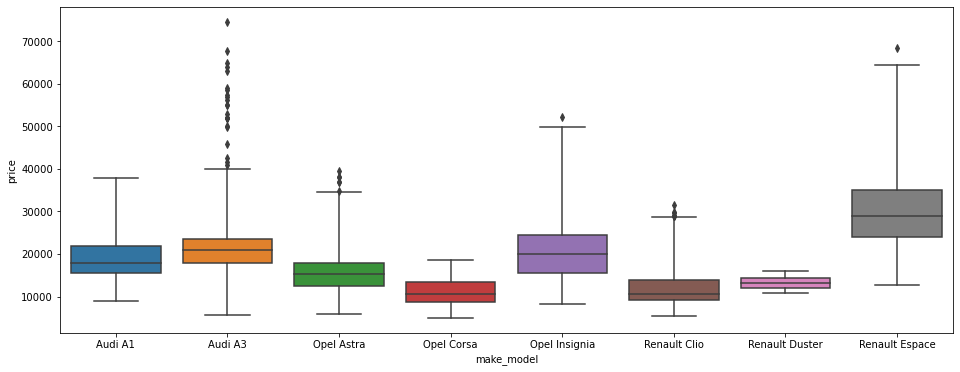

In [22]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

## Get dummies 

In [23]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [24]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [25]:
df = pd.get_dummies(df, drop_first =True)

In [26]:
df.head()

price       km  Gears  age  Previous_Owners  hp_kW  Inspection_new  \
0  15770  56013.0    7.0  3.0              2.0   66.0               1   
1  14500  80000.0    7.0  2.0              1.0  141.0               0   
2  14640  83450.0    7.0  3.0              1.0   85.0               0   
3  14500  73000.0    6.0  3.0              1.0   66.0               0   
4  16790  16200.0    7.0  3.0              1.0   66.0               1   

   Displacement_cc  Weight_kg  cons_comb  cc_Air conditioning  \
0           1422.0     1220.0        3.8                    1   
1           1798.0     1255.0        5.6                    1   
2           1598.0     1135.0        3.8                    1   
3           1422.0     1195.0        3.8                    0   
4           1422.0     1135.0        4.1                    1   

   cc_Air suspension  cc_Armrest  cc_Automatic climate control  \
0                  0           1                             1   
1                  0           0                             1   
2                  0           0                             0   
3                  1           1                             0   
4                  0           1                             1   

   cc_Auxiliary heating  cc_Cruise control  cc_Electric Starter  \
0                     0                  1                    0   
1                     0                  0                    0   
2                     0                  1                    0   
3                     1                  0                    0   
4                     0                  0                    0   

   cc_Electric tailgate  cc_Electrical side mirrors  \
0                     0                           1   
1                     0                           0   
2                     0                           1   
3                     0                           1   
4                     0                           1   

   cc_Electrically adjustable seats  cc_Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2                             0                 0                          1   
3                             0                 0                          1   
4                             0                 0                          1   

   cc_Light sensor  cc_Lumbar support  cc_Massage seats  \
0                1                  0                 0   
1                0                  1                 0   
2                0                  0                 0   
3                1                  1                 0   
4                1                  0                 0   

   cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  \
0                                 1                     1                 0   
1                                 0                     0                 0   
2                                 1                     1                 0   
3                                 1 

In [27]:
df.shape

(15914, 133)

In [28]:
df.isnull().any().any()

False

In [29]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.473478
Gearing_Type_Manual                        -0.431798
km                                         -0.399301
make_model_Opel Corsa                      -0.379363
Type_Used                                  -0.366300
make_model_Renault Clio                    -0.297910
Drive_chain_front                          -0.155738
Previous_Owners                            -0.144625
make_model_Opel Astra                      -0.128429
em_CD player                               -0.092823
em_On-board computer                       -0.077462
ss_Central door lock with remote control   -0.070339
ss_Fog lights                              -0.053086
Paint_Type_Perl effect                     -0.049887
ss_Isofix                                  -0.045762
body_type_Sedans                           -0.044251
ss_Central door lock                       -0.043515
ss_Power steering                          -0.041182
Paint_Type_Uni/basic                       -0.

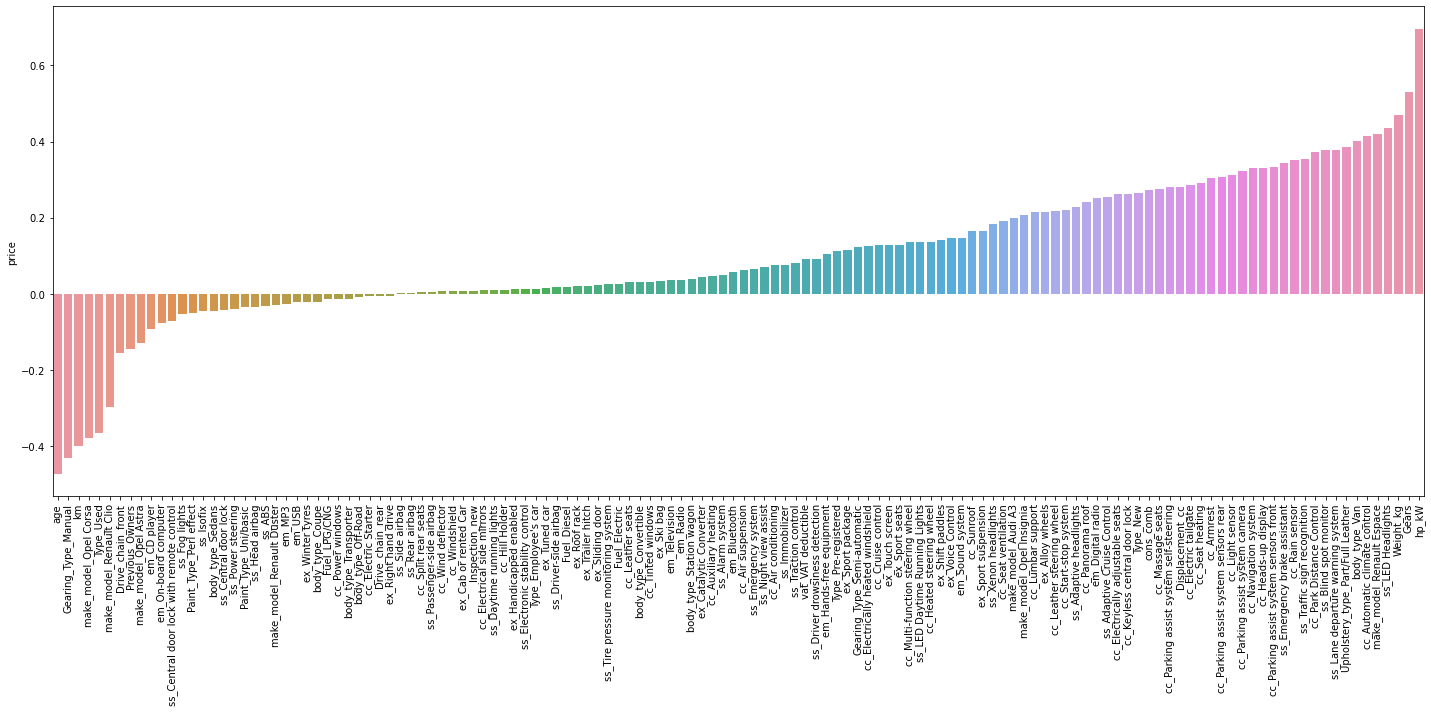

In [30]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

### random_state=101

### test size = 0.2

In [33]:
df.head()

price       km  Gears  age  Previous_Owners  hp_kW  Inspection_new  \
0  15770  56013.0    7.0  3.0              2.0   66.0               1   
1  14500  80000.0    7.0  2.0              1.0  141.0               0   
2  14640  83450.0    7.0  3.0              1.0   85.0               0   
3  14500  73000.0    6.0  3.0              1.0   66.0               0   
4  16790  16200.0    7.0  3.0              1.0   66.0               1   

   Displacement_cc  Weight_kg  cons_comb  cc_Air conditioning  \
0           1422.0     1220.0        3.8                    1   
1           1798.0     1255.0        5.6                    1   
2           1598.0     1135.0        3.8                    1   
3           1422.0     1195.0        3.8                    0   
4           1422.0     1135.0        4.1                    1   

   cc_Air suspension  cc_Armrest  cc_Automatic climate control  \
0                  0           1                             1   
1                  0           0                             1   
2                  0           0                             0   
3                  1           1                             0   
4                  0           1                             1   

   cc_Auxiliary heating  cc_Cruise control  cc_Electric Starter  \
0                     0                  1                    0   
1                     0                  0                    0   
2                     0                  1                    0   
3                     1                  0                    0   
4                     0                  0                    0   

   cc_Electric tailgate  cc_Electrical side mirrors  \
0                     0                           1   
1                     0                           0   
2                     0                           1   
3                     0                           1   
4                     0                           1   

   cc_Electrically adjustable seats  cc_Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2                             0                 0                          1   
3                             0                 0                          1   
4                             0                 0                          1   

   cc_Light sensor  cc_Lumbar support  cc_Massage seats  \
0                1                  0                 0   
1                0                  1                 0   
2                0                  0                 0   
3                1                  1                 0   
4                1                  0                 0   

   cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  \
0                                 1                     1                 0   
1                                 0                     0                 0   
2                                 1                     1                 0   
3                                 1 

In [35]:
X = df.drop("price", axis=1)
y = df["price"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
lm_y_test_pred = lm.predict(X_test)
lm_y_train_pred = lm.predict(X_train)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
lm_test_mae = mean_absolute_error(y_test, lm_y_test_pred)
lm_test_mse = mean_squared_error(y_test, lm_y_test_pred)
lm_test_rmse = mean_squared_error(y_test, lm_y_test_pred) ** 0.5
lm_test_r2 = r2_score(y_test, lm_y_test_pred)

In [44]:
lm_train_mae = mean_absolute_error(y_train, lm_y_train_pred)
lm_train_mse = mean_squared_error(y_train, lm_y_train_pred)
lm_train_rmse = mean_squared_error(y_train, lm_y_train_pred) ** 0.5
lm_train_r2 = r2_score(y_train, lm_y_train_pred)

In [45]:
scores = pd.DataFrame({
    'lm_train' : [lm_train_r2,lm_train_mae,lm_train_mse,lm_train_rmse],
    'lm_test' : [lm_test_r2,lm_test_mae,lm_test_mse,lm_test_rmse]
}
                    ,index = ["r2", "Mae", "Mse", "Rmse"])
scores

lm_train       lm_test
r2    8.899972e-01  8.904937e-01
Mae   1.705452e+03  1.705217e+03
Mse   6.038122e+06  5.785151e+06
Rmse  2.457259e+03  2.405234e+03

In [47]:
lm.coef_

array([-3.56115183e-02,  5.85094442e+02, -1.60432525e+03,  1.28422274e+02,
        9.23925598e+01, -1.79331625e+02, -8.00401728e-01, -1.19140852e+00,
        1.20671145e+02,  2.86407919e+02,  1.19343902e+02,  4.91674245e+01,
        2.39425843e+02, -2.43354239e+02,  2.89560335e+02, -9.93635697e+02,
       -1.31214639e+02,  7.62716901e+01,  1.81840290e+02,  5.01192779e+02,
        2.33356973e+03,  3.20815106e+02,  8.24073299e+01,  7.23449823e+01,
       -7.81526036e+02,  1.49184681e+02,  1.88373673e+02, -3.80530019e+02,
        4.54336284e+02,  6.89122428e+01,  3.05244084e+02, -3.39200280e+02,
        5.37581048e+02,  7.02810814e+01,  9.07510355e+02,  2.62453353e+02,
       -4.02181546e+02,  1.09236810e+02, -2.83853862e+02,  3.84790821e+01,
        8.53777134e+02, -3.15430506e+02, -3.74640551e+01,  8.12983897e+02,
        3.53385002e+01, -4.58081514e+02, -4.48811275e+02, -5.52705554e+02,
        3.13142474e+01,  8.26141360e+02,  5.29152455e+01,  3.12745351e+01,
       -2.89922198e+00,  

## Adjusted R2 Score

In [51]:
n = X_train.shape[0]
n

12731

In [54]:
p = X_train.shape[1]
p

132

In [56]:
adj_r2 = 1 - (1 - lm_test_r2)*(n-1) / (n-p)
adj_r2

0.8893550989211063

## Cross Validate

In [57]:
from sklearn.model_selection import cross_val_score, cross_validate

In [58]:
cross_validate(lm, X_train, y_train, cv=10)

{'fit_time': array([0.06889606, 0.06853509, 0.06258607, 0.08510065, 0.08976603,
        0.07311511, 0.05760527, 0.05216217, 0.05012798, 0.0457077 ]),
 'score_time': array([0.00326777, 0.00330019, 0.00477219, 0.00576735, 0.00647116,
        0.00560093, 0.00447202, 0.00441599, 0.00500894, 0.00436807]),
 'test_score': array([0.88752729, 0.88371388, 0.88929339, 0.88302457, 0.88968077,
        0.8855113 , 0.88595306, 0.90096554, 0.87418662, 0.88133816])}

## Prediction Error

## Residual Plot

## Dropping observations from the dataset that worsen my predictions

### test size = 0.2

In [ ]:
df3 

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

## Ridge

## Random state=42

## Finding best alpha for Ridge

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

## Finding best alpha for Lasso

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

## Finding best alpha and l1_ratio for ElasticNet

## random state = 42

## Feature Importance

In [ ]:
df_new

In [ ]:
df_new.head()

In [ ]:
## test_size=0.2, random_state=101)

In [ ]:
##Lasso(random_state=42)

In [ ]:
2230/df_new.price.mean()

## 7. Visually Compare Models Performance In a Graph

In [ ]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

In [ ]:
for i in scores:
    print(i)

In [ ]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

## Prediction new observation

## random state=42

___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___